In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

- id : station identification code
- date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
- element : indicator of element type
- TMAX : Maximum temperature (tenths of degrees C)
- TMIN : Minimum temperature (tenths of degrees C)
- value : data value for element (tenths of degrees C)

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2015. The area between the record high and record low temperatures for each day should be shaded.

2. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165085 entries, 0 to 165084
Data columns (total 4 columns):
ID            165085 non-null object
Date          165085 non-null object
Element       165085 non-null object
Data_Value    165085 non-null int64
dtypes: int64(1), object(3)
memory usage: 5.0+ MB


In [4]:
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [5]:
df['Date'] =\
pd.to_datetime(df['Date'])

In [6]:
df['Year'] =\
df['Date'].dt.year

In [7]:
df_high = df.groupby('Year')['Data_Value'].max()
df_low = df.groupby('Year')['Data_Value'].min()

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

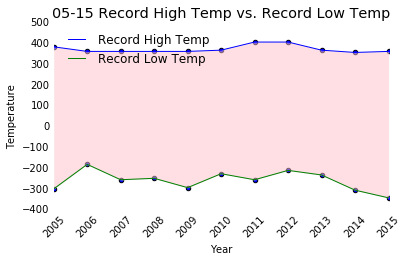

In [9]:
df_high.plot()
df_low.plot()

plt.scatter(df_high.index.values, df_high.values)
plt.scatter(df_low.index.values, df_low.values)

plt.style.use('ggplot')

ax = plt.gca()

x = ax.xaxis

# rotate the tick labels for the x axis so that the letters don't overlap
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

# setting y-abel and title
ax.set_ylabel('Temperature')
ax.set_title('05-15 Record High Temp vs. Record Low Temp')

# changing the number x ticks so that all data can be shown clearly
plt.xticks(np.arange(2005, 2016, 1))

# fill the area with some color between the record high and record low temp
ax.fill_between(np.arange(2005, 2016, 1), df_high, df_low,facecolor='pink', alpha=0.5)

# settings for legend
plt.legend(['Record High Temp', 'Record Low Temp'], loc=2, frameon=False)

# removing unnecessary tick lines and leaving just the left and bottom labels
plt.tick_params(top='off', bottom='off', left='off', right='off', 
                labelleft='on', labelbottom='on')

# removing frame frame chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)